
neighbor changed (random)
neighbor path: [0, 4, 52, 78, 79, 88, 94, 30, 14, 92, 28, 17, 56, 60, 24, 42, 45, 75, 3, 76, 27, 36, 41, 67, 48, 20, 53, 16, 32, 74, 97, 34, 22, 19, 26, 39, 46, 81, 18, 72, 55, 82, 64, 83, 15, 70, 47, 8, 84, 49, 59, 85, 40, 63, 61, 7, 25, 23, 69, 90, 2, 31, 89, 1, 57, 65, 11, 68, 33, 38, 62, 9, 87, 13, 95, 54, 71, 86, 6, 77, 37, 93, 99, 35, 44, 80, 21, 5, 43, 73, 29, 58, 10, 66, 12, 51, 50, 96, 98, 91, 0]
neighbor cost: 524.654104389332

neighbor changed (better neighbor)
neighbor path: [0, 4, 52, 78, 35, 99, 93, 37, 77, 6, 86, 71, 54, 95, 13, 87, 9, 62, 38, 33, 68, 11, 65, 57, 1, 89, 31, 2, 90, 69, 23, 25, 7, 61, 63, 40, 85, 59, 49, 84, 8, 47, 70, 15, 83, 64, 82, 55, 72, 18, 81, 46, 39, 26, 19, 22, 34, 97, 74, 32, 16, 53, 20, 48, 67, 41, 36, 27, 76, 3, 75, 45, 42, 24, 60, 56, 17, 28, 92, 14, 30, 94, 88, 79, 44, 80, 21, 5, 43, 73, 29, 58, 10, 66, 12, 51, 50, 96, 98, 91, 0]
neighbor cost: 524.2033867638572

neighbor changed (random)
neighbor path: [0, 4, 52, 7

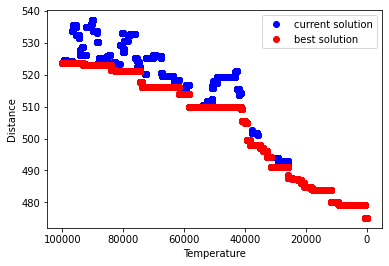

In [186]:
import random
import math
import pandas as pd
import time

def Euclidean_Distance(A,B):
    #print(A,B)
    d = (A[1] - B[1]) ** 2 + (A[2] - B[2]) ** 2
    d = math.sqrt(d)
    return d

def Nearleast(dList, route):
    shortVal = 10e9
    shortIndex = -1
    for i in range(len(dList)):
        if shortVal > dList[i] and not i in route:
            #print(f"dList[i]: {dList[i]}")
            shortVal = dList[i]
            shortIndex = i
    #print(f"shortIndex: {shortIndex}, dList[i]: {dList[shortIndex]}")

    #print(shortVal, shortIndex)
    
    return shortVal, shortIndex



pMat = pd.read_csv("Input_data.csv")
pMat = pd.DataFrame(pMat)

#print(pMat)
#print(pMat.iloc[1][2])

n = pMat.shape[0]
dMat = [[0]*n for _ in range(n)]

for i in range(n):
    for j in range(i,n):
        if i == j:
            dMat[i][j] = 1e10
        else:
            dMat[i][j] = dMat[j][i] = Euclidean_Distance(pMat.iloc[i], pMat.iloc[j])

def get_total_distance(route: list):
    distance = 0
    for i in range(len(route)-1):
        #print(route[i], route[i+1], dMat[route[i]][route[i+1]], distance)
        distance += dMat[route[i]][route[i+1]]
    return distance

#greedy
initial_path = [0, 4, 52, 78, 79, 88, 94, 30, 14, 92, 28, 17, 56, 60,24, 42, 45, 75, 3, 76, 27, 36, 41, 67, 48, 20, 53, 16, 32,74, 97, 34, 22, 19, 26, 39, 46, 81, 18, 72, 55, 82, 64, 83,15, 70, 47, 8, 84, 49, 59, 85, 40, 63, 61, 7, 25, 23, 69, 90,2, 31, 89, 1, 57, 65, 11, 68, 33, 38, 62, 9, 87, 13, 95, 54,71, 86, 6, 77, 37, 93, 99, 35, 44, 91, 98, 96, 50, 51, 12,66, 10, 58, 29, 73, 43, 5, 21, 80, 0]

#random
#initial_path = [0, 50, 44, 52, 86, 82, 32, 12, 83, 41, 42, 17, 74, 66, 33, 93, 27, 45, 2, 60, 61, 16, 99, 11, 21, 54, 88, 3, 72, 91, 77, 67, 19, 58, 78, 96, 80, 57, 51, 64, 4, 47, 87, 13, 95, 59, 20, 38, 53, 25, 34, 89, 28, 65, 14, 39, 94, 40, 76, 79, 90, 30, 26, 22, 23, 55, 24, 81, 5, 36, 8, 63, 31, 35, 70, 62, 69, 97, 49, 18, 1, 84, 43, 98, 6, 48, 75, 92, 46, 15, 10, 85, 56, 37, 29, 9, 73, 71, 7, 68, 0]

initial_cost = get_total_distance(initial_path)

# simulated annealing

# 결정 확률 및 이동 결정
# exp((e1 - e2) / (k*t)
def random_switch(e1, e2, t):
    k = 0.00002

    delta = abs(e1 - e2) * (-1)
    p = math.exp(delta / (k*t))

    #print(p)
    #print(random.random())

    if random.random() < p:
        return True


    return False

# 중복없이 랜덤한 수 2개 추출
def random2(start, end):
    aList = []
    for i in range(2):
        a = random.randint(start, end)
        while a in aList:
            a = random.randint(start, end)
        aList.append(a)

    aList.sort()
    return aList


#index i부터 k까지 뒤집는다.
#시작위치와 끝위치는 바뀌면 안되므로 i는 1 이상, k는 len(path)-2 이하
def swap(path, i, k):
    new_path = path[:i] + path[k:i-1:-1] + path[k+1:]
    return new_path


# 온도가 높으면 swap을 더 많이 실행
def neighbor_solution(path, swap_Count):

    if swap_Count < 1:
        swap_Count = 1

    if swap_Count > len(path) - 2:
        swap_Count = len(path) - 2
    

    # 임시로 한번만 실행
    for i in range(1):
        a, b = random2(1, len(path) - 2)
        path = swap(path, a, b)

    return path


def sa():

    # start time
    startTime = time.time()

    # initial temperature
    t0 = 100000

    # temperature reduction
    tReduction = 10

    # initialize current temperature
    tCurrent = t0

    # finial temperature
    tFinal = 0

    # time limit (3 minutes)
    limitTime = 180

    # initialize current_path
    global initial_path
    current_path = initial_path

    # initialize current_cost
    global initial_cost
    current_cost = initial_cost

    # initialize best_path
    best_path = current_path

    # initialize best_cost
    best_cost = current_cost

    # current List for graph
    current_list = []
    # best List for graph
    best_list = []
    # temperature List for graph
    temperature_list = []


    while True:

        neighbor_path = neighbor_solution(current_path, tCurrent//10000 )
        neighbor_cost = get_total_distance(neighbor_path)
        
        # 이웃 값이 더 작다면, 현재 값과 교체
        if neighbor_cost < current_cost:
            print("\nneighbor changed (better neighbor)")
            print(f"neighbor path: {neighbor_path}")
            print(f"neighbor cost: {neighbor_cost}")
            current_path = neighbor_path
            current_cost = neighbor_cost
            
        
        # 이웃 값이 더 크다면, 확률에 따라 교체할 수 있음
        else:
            if random_switch(current_cost, neighbor_cost, tCurrent):
                print("\nneighbor changed (random)")
                print(f"neighbor path: {neighbor_path}")
                print(f"neighbor cost: {neighbor_cost}")
                current_path = neighbor_path
                current_cost = neighbor_cost
        

        # 최고 솔루션 갱신
        if current_cost < best_cost:
            best_path = current_path
            best_cost = current_cost
            

            print("\n최고 솔루션 갱신")
            print(f"best path: {best_path}")
            print(f"best cost: {best_cost}")
        
        current_list.append(current_cost)
        best_list.append(best_cost)
        temperature_list.append(tCurrent)
        # 온도 감소
        tCurrent -= tReduction
        runTime = time.time() - startTime

        # 종료 조건 체크

        if tCurrent <= tFinal or runTime > limitTime:
            break

    print(f"\nlength: {len(best_path)}")
    print(f"best_path: {best_path}")
    print(f"best_cost: {best_cost}")
    


    return current_list, best_list, temperature_list

current_list, best_list, temperature_list = sa()

import numpy as np
import matplotlib.pyplot as plt



plt.plot(temperature_list, current_list, "bo")
plt.plot(temperature_list, best_list, "ro")
plt.xlabel('Temperature')
plt.ylabel('Distance')
plt.legend(['current solution', 'best solution'])
plt.gca().invert_xaxis()
plt.show()


In [ ]:
asdf = [0, 4, 79, 52, 78, 3, 75, 45, 42, 60, 24, 56, 17, 28, 92, 14, 30, 94, 35, 88, 99, 37, 93, 77, 6, 86, 71, 54, 95, 13, 87, 9, 62, 33, 68, 38, 11, 65, 57, 1, 89, 31, 2, 90, 69, 23, 63, 61, 7, 25, 98, 96, 50, 51, 12, 66, 58, 10, 43, 5, 80, 21, 73, 29, 85, 40, 59, 49, 84, 8, 47, 70, 15, 64, 83, 82, 55, 18, 72, 81, 46, 26, 39, 19, 22, 34, 97, 74, 32, 16, 53, 20, 67, 41, 48, 36, 27, 76, 91, 44, 0]

print(get_total_distance(asdf))
print(len(asdf))




433.8549807652397
101


In [181]:
def random_switch(e1, e2, t):
    k = 0.001

    delta = abs(e1 - e2) * (-1)
    p = math.exp(delta / (k*t))

    print(p)
    #print(random.random())

    if random.random() < p:
        return True


    return False

random_switch(500, 600, 1000)

3.720075976020836e-44


False